In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [6]:
# Upload Dataset
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling (1).csv


In [7]:
# Load Dataset
df = pd.read_csv('Churn_Modelling.csv')
df.head()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [8]:
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

In [9]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

df = pd.get_dummies(df, columns=["Geography"], drop_first=True)

In [10]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    }

In [16]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

lr_metrics = evaluate_model(lr, X_test, y_test)
lr_metrics

{'Accuracy': 0.808,
 'Precision': 0.5891472868217055,
 'Recall': 0.18673218673218672,
 'F1-Score': 0.2835820895522388}

In [17]:
# Random Forest Classifier
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

rf.fit(X_train, y_train)
rf_metrics = evaluate_model(rf, X_test, y_test)
rf_metrics

{'Accuracy': 0.8605,
 'Precision': 0.7711864406779662,
 'Recall': 0.44717444717444715,
 'F1-Score': 0.5660964230171073}

In [18]:
# Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

gb_metrics = evaluate_model(gb, X_test, y_test)
gb_metrics

{'Accuracy': 0.87,
 'Precision': 0.7928286852589641,
 'Recall': 0.48894348894348894,
 'F1-Score': 0.6048632218844985}

In [19]:
results = pd.DataFrame({
    "Logistic Regression": lr_metrics,
    "Random Forest": rf_metrics,
    "Gradient Boosting": gb_metrics
})

results

,Logistic Regression,Random Forest,Gradient Boosting
Accuracy,0.808000,0.860500,0.870000
Precision,0.589147,0.771186,0.792829
Recall,0.186732,0.447174,0.488943
F1-Score,0.283582,0.566096,0.604863


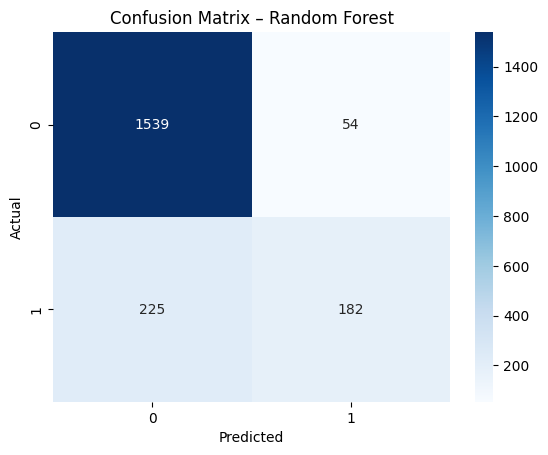

In [20]:
y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Random Forest")
plt.show()